In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
train = pd.read_csv("train3.csv")
test = pd.read_csv("test3.csv")

In [3]:
X_train = train.drop("Direction", axis=1)
X_train.head()

,Sentiment,Previous
0,0.000000,1
1,0.150000,-1
2,0.119048,1
3,0.191667,-1
4,0.311111,-1


In [4]:
y_train = train.drop("Sentiment", axis=1)
y_train = y_train.drop("Previous", axis=1)
y_train.head()

,Direction
0,-1
1,1
2,-1
3,-1
4,-1


In [5]:
X_test = test.drop("Direction", axis=1)
X_test.head()

,Sentiment,Previous
0,0.068016,-1
1,0.107659,1
2,0.095354,1
3,0.116604,1
4,0.110642,1


In [6]:
y_test = test.drop("Sentiment", axis=1)
y_test = y_test.drop("Previous", axis=1)
y_test.head()

,Direction
0,1
1,1
2,1
3,1
4,-1


So we are attempting to predict/classify the Direction as Up or Down.

We have the following methods which may work:
<br>
Decision Tree
<br>
Random Forests
<br>
Naive Bayes
<br>
SVM
<br>
KNN
<br>
Logistic Regression
<br>
Linear Discriminant Analysis

Let's work through them in order and see what we can do....

Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dtree = DecisionTreeClassifier()

In [9]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
pred_d = dtree.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

In [12]:
print(confusion_matrix(y_test,pred_d))

[[ 4 14]
 [13 10]]


In [13]:
print(accuracy_score(y_test, pred_d))

0.34146341463414637


Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=4)
rfc.fit(X_train, y_train)

/Users/jasonswan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [119]:
rfc_pred = rfc.predict(X_test)

In [120]:
print(confusion_matrix(y_test,rfc_pred))

[[ 4 14]
 [15  8]]


In [121]:
print(accuracy_score(y_test, rfc_pred))

0.2926829268292683


Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
gnb = GaussianNB()

In [20]:
gnb.fit(X_train,y_train)

/Users/jasonswan/opt/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
gnb_pred = gnb.predict(X_test)

In [22]:
print(confusion_matrix(y_test,gnb_pred))

[[ 4 14]
 [15  8]]


SVM

In [23]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

/Users/jasonswan/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
pred_svm = model.predict(X_test)

In [25]:
print(confusion_matrix(y_test,pred_svm))

[[ 4 14]
 [15  8]]


K Nearest Neighbours

In [351]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

/Users/jasonswan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [352]:
print(confusion_matrix(y_test,pred_knn))

[[11  7]
 [16  7]]


In [353]:
print(accuracy_score(y_test, pred_knn))

0.43902439024390244


Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/jasonswan/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
pred_log = logmodel.predict(X_test)

In [32]:
print(confusion_matrix(y_test,pred_log))

[[ 4 14]
 [15  8]]


In [2]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
y = [0.2683, 0.3171, 0.2927, 0.2683, 0.3171, 
     0.3659, 0.3171, 0.2927, 0.2683, 0.3659, 
     0.3171, 0.3415, 0.3415, 0.3171, 0.3171, 
     0.3171, 0.3415, 0.3415, 0.3415, 0.2683]

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

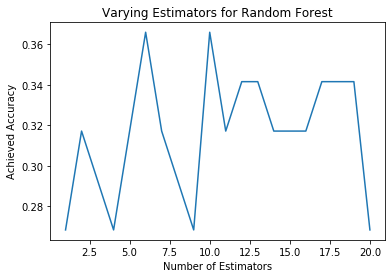

In [7]:
plt.plot(x, y)
plt.ylabel('Achieved Accuracy')
plt.xlabel('Number of Estimators')
plt.title('Varying Estimators for Random Forest')
plt.savefig('rf.pdf')

In [8]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
b = [0.3659, 0.3902, 0.3415, 0.4390, 0.4146, 
     0.3659, 0.3902, 0.3659, 0.3902, 0.4146,
     0.3415, 0.3659, 0.3415, 0.3171, 0.3415,
     0.3171, 0.3171, 0.2927, 0.3171, 0.3171]

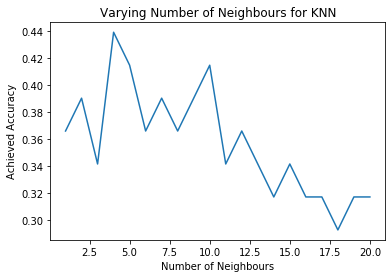

In [9]:
plt.plot(a, b)
plt.ylabel('Achieved Accuracy')
plt.xlabel('Number of Neighbours')
plt.title('Varying Number of Neighbours for KNN')
plt.savefig('knn.pdf')

In [345]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)

/Users/jasonswan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [346]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[ 4 14]
 [13 10]]


In [347]:
print(accuracy_score(y_test, rfc_pred))

0.34146341463414637
